# Week 7 Practice

## Graham Swain
## October 10, 2022

I am using a dataset that I got from Justin Clifton. It is a list of all stats for NBA players from 1974-2017, and who won MVP.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
nba_df = pd.read_csv('NBA_Stats_MVP.csv')

In [3]:
def missing_values(df):
    print('%-11s | %s' % ('Column', 'Missing Values'))
    print('-----------------------------')
    cols = df.columns
    for c in cols:
        s = sum(df[c].isna())
        print('%-11s | %d' % (c, s))

missing_values(nba_df)

Column      | Missing Values
-----------------------------
Year        | 0
Pos         | 0
Age         | 0
Tm          | 0
G           | 0
GS          | 2564
MP          | 0
PER         | 5
TS%         | 82
3PAr        | 1958
FTr         | 94
ORB%        | 5
DRB%        | 5
TRB%        | 5
AST%        | 5
STL%        | 5
BLK%        | 5
TOV%        | 1215
USG%        | 1157
OWS         | 0
DWS         | 0
WS          | 0
WS/48       | 5
OBPM        | 0
DBPM        | 0
BPM         | 0
VORP        | 0
FG          | 0
FGA         | 0
FG%         | 94
3P          | 1870
3PA         | 1870
3P%         | 5381
2P          | 0
2PA         | 0
2P%         | 123
eFG%        | 94
FT          | 0
FTA         | 0
FT%         | 792
ORB         | 0
DRB         | 0
TRB         | 0
AST         | 0
STL         | 0
BLK         | 0
TOV         | 1152
PF          | 0
PTS         | 0
is_allstar  | 0
Name        | 0
was_mvp     | 0


A lot of the missing data is because they use to not track as many stats as they do now. If we drop the rows with missing stats we are still left with the data from 1980 onwards. Another reason is the 3-point line wasn't added until 1979, so there are no stats for it before that.

For the most part the missing data is likely not that important, so we also could have dropped the columns that are missing data, and have data since 1974, but with fewer stats. We would have to do something about the 3-pointers though, since they are so important in today's game. We couldn't drop them entirely since there have been players win MVP because they were good from deep. We might be able to insert 0 for the 3P stats, but that will skew the data and likely cause problems with an predictions we make. So dropping the earlier years seems like it is the best option, at least for creating a simple model.

In [4]:
nba_df.dropna(axis = 0, inplace = True)

I am creating a second dataframe of player's who started more than the mean amount of games in that particular season, which came out to be about 30 games. I am mostly doing this just so the plots are less busy, but I'll go ahead and make every graph using both dataframes so we can see the difference.

In [5]:
nba_df2 = nba_df.loc[nba_df['GS'] > nba_df['GS'].mean()]

The two graphs below are showing the field goal percentage vs field goals attempted. They clearly show that MVPs generally attempt a lot of shots. One thing that stood out a little is one might expect the MVPs to have a higher percentage, but they don't really. Most of them are average to a little above average. Some of this could be because of comparing across eras. As everyone shoots at a higher percentage, so older MVPs won't look as impressive compared to some modern day stats.

<AxesSubplot:xlabel='FG%', ylabel='FGA'>

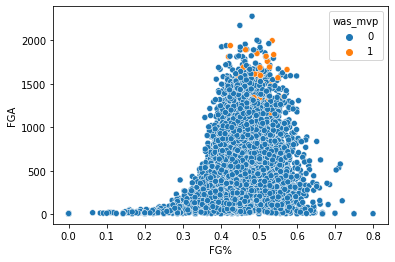

In [30]:
sns.scatterplot(data = nba_df, x = 'FG%', y = 'FGA', hue = 'was_mvp')

<AxesSubplot:xlabel='FG%', ylabel='FGA'>

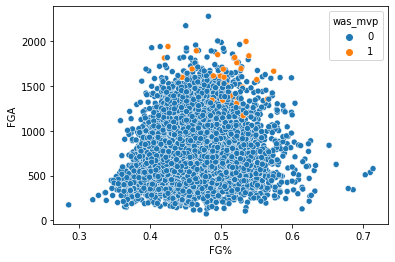

In [7]:
sns.scatterplot(data = nba_df2, x = 'FG%', y = 'FGA', hue = 'was_mvp')

I made the same plots but looking at 3-pointers. I also made the MVPs larger, as they were hidden behind all the other players. They're still hard to see, but this made it a little easier.

There doesn't seem to be a strong correlation between 3-pointers and MVP.

<AxesSubplot:xlabel='3P%', ylabel='3PA'>

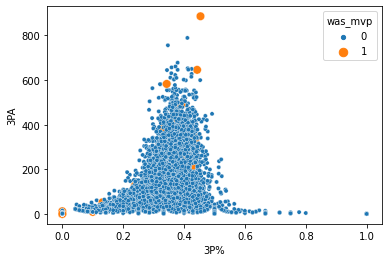

In [28]:
sns.scatterplot(data = nba_df, x = '3P%', y = '3PA', hue = 'was_mvp', size = 'was_mvp', size_order = [1, 0])

<AxesSubplot:xlabel='3P%', ylabel='3PA'>

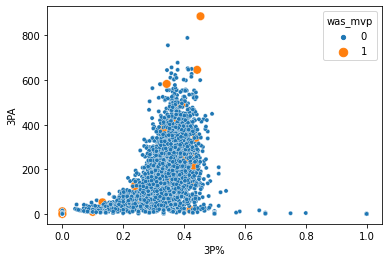

In [19]:
sns.scatterplot(data = nba_df2, x = '3P%', y = '3PA', hue = 'was_mvp', size = 'was_mvp', size_order = [1, 0])

One more sets of plots to look at rebounds and blocks. There does seem to be some correlation, especially with rebounds, but there are still MVPs who are average to below average as well.

<AxesSubplot:xlabel='BLK', ylabel='TRB'>

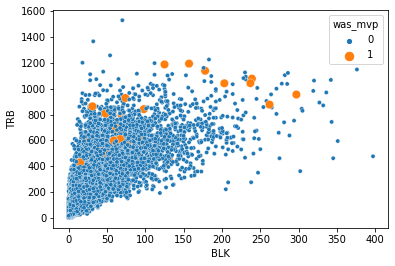

In [35]:
sns.scatterplot(data = nba_df, x = 'BLK', y = 'TRB', hue = 'was_mvp', size = 'was_mvp', size_order = [1, 0])

<AxesSubplot:xlabel='BLK', ylabel='TRB'>

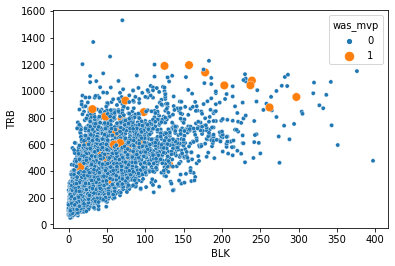

In [34]:
sns.scatterplot(data = nba_df2, x = 'BLK', y = 'TRB', hue = 'was_mvp', size = 'was_mvp', size_order = [1, 0])